In [69]:
import numpy as np
import matplotlib.pyplot as plt
from Batoid4LOFT.LAZULI_STOP import Lazuli_stop, readBulkMotion, readDeformation
from tqdm import tqdm
import matplotlib.patches as patches


In [70]:
lazuli = Lazuli_stop()

fields_x = np.linspace(-16.2, 16.2, 33) / 60 # +/- 16.2 arcmin in x
fields_y = np.linspace(-4.8, 4.8, 11) / 60  # +/- 4.8 arcmin in y

opds = []
rms_vals = np.zeros((len(fields_x), len(fields_y)))

with tqdm(total=len(fields_x) * len(fields_y)) as pbar:
    for i, fx in enumerate(fields_x):
        for j, fy in enumerate(fields_y):
            raytrace = lazuli.get_OPD(fieldX=fx, fieldY=fy, npx=128)
            opds.append(raytrace['wavefront'].array.data * ~raytrace['wavefront'].array.mask)
            rms_vals[i, j] = np.sqrt(np.mean(opds[-1] ** 2))
            pbar.update(1)

  0%|          | 0/363 [00:00<?, ?it/s]

100%|██████████| 363/363 [00:02<00:00, 144.91it/s]


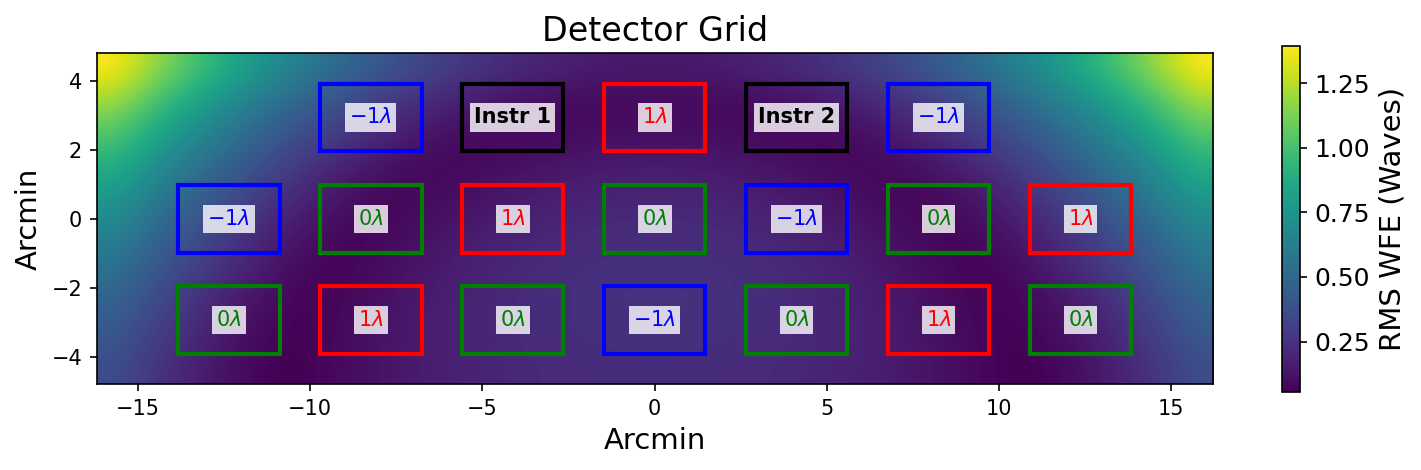

In [ ]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 3), dpi=150)
im = ax.imshow(rms_vals.T, interpolation='bicubic', extent=[-16.2, 16.2, -4.8, 4.8], origin='lower')
cb = plt.colorbar(im)
cb.set_label('RMS WFE (Waves)', fontsize=14)
cb.ax.tick_params(labelsize=12)
ax.set_xlabel('Arcmin', fontsize=14)
ax.set_ylabel('Arcmin', fontsize=14)
ax.set_title('Detector Grid', fontsize=16)

# Define detector positions and dimensions
platescale = 4.905 # arcsec/mm

w = 36 * platescale / 60
h = 24 * platescale / 60
w_offset = w / 2
h_offset = h / 2

x_spacing = w * 1.4
y_spacing = h * 1.5

boxes = []

# Row 1
count = 1
defocus_vals = [-1, 0, 1, 0, -1]
x_positions = np.linspace(-2 * x_spacing, 2 * x_spacing, 5)
y_position = 1 * y_spacing
for i, x in enumerate(x_positions):
    position = (x - w_offset, y_position - h_offset)
    if defocus_vals[i] == 0:
        c = "black"
        l = f"Instr {count:.0f}"
        count += 1
    elif defocus_vals[i] == -1:
        c = "blue"
        l = f"${defocus_vals[i]:.0f}\lambda$"
    elif defocus_vals[i] == 1:
        c = "red"
        l = f"${defocus_vals[i]:.0f}\lambda$"
    boxes.append({"xy": position, "width": w, "height": h, "color": c, "label": l, "defocus" : defocus_vals[i], })

# Row 2
defocus_vals = [-1, 0, 1, 0, -1, 0, 1]
x_positions = np.linspace(-3 * x_spacing, 3 * x_spacing, 7)
y_position = 0
for i, x in enumerate(x_positions):
    position = (x - w_offset, y_position - h_offset)
    if defocus_vals[i] == 0:
        c = "green"
    elif defocus_vals[i] == -1:
        c = "blue"
    elif defocus_vals[i] == 1:
        c = "red"
    boxes.append({"xy": position, "width": w, "height": h, "color": c, "label": f"${defocus_vals[i]:.0f}\lambda$", "defocus" : defocus_vals[i]})

# Row 3
defocus_vals = [0, 1, 0, -1, 0, 1, 0]
x_positions = np.linspace(-3 * x_spacing, 3 * x_spacing, 7)
y_position = -1 * y_spacing
for i, x in enumerate(x_positions):
    position = (x - w_offset, y_position - h_offset)
    if defocus_vals[i] == 0:
        c = "green"
    elif defocus_vals[i] == -1:
        c = "blue"
    elif defocus_vals[i] == 1:
        c = "red"
    boxes.append({"xy": position, "width": w, "height": h, "color": c, "label": f"${defocus_vals[i]:.0f}\lambda$", "defocus" : defocus_vals[i]})

# Draw each box and label with a white background
for box in boxes:
    rect = patches.Rectangle(box["xy"], box["width"], box["height"],
                             linewidth=2, edgecolor=box["color"], facecolor='none')
    ax.add_patch(rect)

    # Compute center of the box
    center_x = box["xy"][0] + box["width"] / 2
    center_y = box["xy"][1] + box["height"] / 2

    ax.text(center_x, center_y, box["label"],
            color=box["color"], fontsize=10, weight='bold',
            ha='center', va='center',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, pad=2))


In [72]:
for box in boxes:
    print((box["xy"][0] + w_offset, box["xy"][1] + h_offset))

(-8.2404, 2.943)
(-4.1202, 2.943)
(0.0, 2.943)
(4.120199999999999, 2.943)
(8.2404, 2.943)
(-12.360599999999998, 0.0)
(-8.240399999999998, 0.0)
(-4.120199999999999, 0.0)
(0.0, 0.0)
(4.1202000000000005, 0.0)
(8.240400000000001, 0.0)
(12.360599999999998, 0.0)
(-12.360599999999998, -2.943)
(-8.240399999999998, -2.943)
(-4.120199999999999, -2.943)
(0.0, -2.943)
(4.1202000000000005, -2.943)
(8.240400000000001, -2.943)
(12.360599999999998, -2.943)


In [73]:
from utils import save_pickle

save_pickle('/home/derbyk/src/ffpr/data/detector_data.pkl', data=boxes)

Saved data to:  /home/derbyk/src/ffpr/data/detector_data.pkl
